In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import time

In [2]:
import os
os.chdir('..')
import rwpropa as rw

Propagator initialized
Propagator initialized
Propagator initialized


In [3]:
from pathlib import Path
path_figs = 'comparison/uhecrs_4e27m/figures'
path_data = 'comparison/uhecrs_4e27m/data'
path_data_raw = 'comparison/uhecrs_4e27m/data/raw_data'
Path(path_figs).mkdir(parents=True, exist_ok=True)
Path(path_data).mkdir(parents=True, exist_ok=True)
Path(path_data_raw).mkdir(parents=True, exist_ok=True)

## Ultra high energy cosmic rays (UHECRs) in intergalactic magnetic fields (IGMFs)

Introduction into IGMFs is cpoied from Schlegel et al. (2020): "The question of the generation and maintenance of large-scale magnetic fields in the Universe is still highly debated and unsolved. The existence of intergalactic, turbulent magnetic fields has two evolutionary scenarios: Either, they result from the evolution of primordial fields under the influence of structure formation or, they are generated by the galactic outflow of magnetic fields by winds (e.g. Kronberg (1994); Grasso & Rubinstein (2001); Kulsrud & Zweibel (2008)). Both the supercluster medium and the large-scale structures of our Universe are hardly constrained by observations. 

The two different scenarios may cause huge differences with respect to the magnetic field strength (Hackstein et al. 2018). Currently, only upper limits of about a few nG constrains the field strength in the voids (Pshirkov et al. 2016; Ade, P. A. R. et al. 2016). Stronger constraints can in principle be derived from the observation of gamma-ray induced cascades (Neronov et al. 2013) - it is not clear, however, how large the influence of the pair instability during the propagation of the electron-positron pairs are not well-quantified at this point (Broderick et al. 2012).

In the following, we suppose for simplicity that a uniform isotropic turbulent magnetic field is present within
these large-scale structures and consider the propagation of individual CRs through these fields. The field will be characterized as follows:"
- isotropic 3d Kolmogorov turbulence
- magnetic field strength: 1 nano Gaus
- correlation length turbulence: 1 Mpc $\sim 3 \cdot 10^{22}$ m
- particle energies: 10 EeV

In [4]:
l_c = 10**6 # [pc]
energy = 10**19 # [eV]

These parameters will result in gyroradii of the charged CRs:
\begin{align}
r_\mathrm{g} = \frac{\sqrt{2} E}{q\,c\,B} = \frac{14.1\,\mathrm{EeV}}{q\,c \cdot 1\mathrm{nG}} \approx 4.7\cdot 10^{23}\,\mathrm{m} \approx 4.7\cdot 10^{20}\,\mathrm{km} \approx 15\,\mathrm{Mpc}.
\end{align}

In [5]:
r_g = 1.5*10**7 # [pc]

Particles are in the quasi-ballistic transport regime ($r_\mathrm{g} \gg l_\mathrm{c}$), where they experience only minor deflections. The expected diffusion coefficient $\kappa$ is (see e.g. Subedi, P. et al. 2017, ApJ, 837, 140. doi:10.3847/1538-4357/aa603a):
\begin{align}
\kappa_\mathrm{theory} = \frac{r_\mathrm{g}^2 \cdot c}{2l_\mathrm{c}} = \frac{(4.7\cdot10^{23}\,\mathrm{m})^2 \cdot c}{2\cdot 3 \cdot 10^{22}\,m} \approx 1.08\cdot10^{33}\,\frac{\mathrm{m^2}}{\mathrm{s}} \approx 1.08\cdot10^{27}\,\frac{\mathrm{km^2}}{\mathrm{s}} \approx 1.14\frac{\mathrm{pc^2}}{\mathrm{s}}.
\end{align}

In [6]:
kappa_theory = 1.14 # [pc^2/s]

This theoretical diffusion coefficient serves as an input for the RWPropa simulation and as a reference for the numerical simulations.

This diffusion coefficient results in expected mean-free paths of
\begin{align}
\lambda_\mathrm{theory} = \frac{3 \kappa_\mathrm{theory}}{c} \approx 1.08\cdot10^{25}\,\mathrm{m} \approx 1.08\cdot10^{22}\,\mathrm{km} \approx 351\,\mathrm{Mpc}.
\end{align}
Particles become diffusive at trajectory lengths of about $\lambda$, which is why we stop the simulations after trajectory lengths of $4\cdot 10^{27}$ m $\approx 1.3\cdot 10^{11}$ pc to have some buffer and a clear plateau in the running diffusion coefficients. Even though that these are extreme distances, there are observations from gamma-ray bursts that are even further away at a few Gpc.

In [7]:
lambda_theory = 3.51*10**8 # [pc]
traj_max = 1.3*10**11# [pc]

In [8]:
pc = 3.086*10**16 # [m]
step_sizes = (np.logspace(20, 26, 19)[::-1])/pc # [pc]

### Simulations with CRPropa
CRPropa is a state of the art propagation code that can propagate CRs by solving both the equation of motion (ballistic) and the transport equation (diffusive) in arbitrary magnetic fields. 

#### Installation
Following the installation of CRPropa in a virtuelenv as described in https://crpropa.github.io/CRPropa3/pages/Installation.html

#### Simulation
Run the **simulation script** *comparison/crp_sim_agn.py* in your CRPropa environment:
This starts 15 simulations with varying step sizes of the integration routine. This convergence test is necessary to find the required resolution (step size) of the simulation routine that solves the equation of motion. The simulation results are evaluated by determining the diffusion coefficients, which provide a statistical description of the transport. 

#### Simulation results
The raw data (position, momentum,..) of the simulations are stored in *path_data_raw* (default is */comparison/data/raw_data*). The analyzed data (diffusion coefficients, simulation time,..) are stored in *path_data* (default is */comparison/data*) and will be used in the following. 

### Simulations with PropPy
In the following we perform the same simulations as in CRPropa with PropPy.

### Effect of different seeds for synthetic turbulence

...
parameters:
- maximal trajectory length: $10^{17}$ m
- step size: $10^{10}$ m 
- propagation module: PropagationBP
- turbulence: PlaneWave [PW] with 1000 modes

In [9]:
df_BP_PW_seeds = pd.read_pickle('comparison/compact_sources_4e27m_seed_analysis/data/crp_sim_data_BP_seed_.pkl')
kappa_bp_mean = np.mean(df_BP_PW_seeds['kappa'])
kappa_bp_mean_err = np.std(df_BP_PW_seeds['kappa'])
print(kappa_bp_mean, kappa_bp_mean_err)
df_BP_PW_seeds

9.292208843070124e+32 3.05853192481375e+31


,seed,time,kappa,kappa_err
0,0.0,62602.557883,9.509087e+32,7.402953e+30
1,1.0,62588.548076,9.542151e+32,4.920747e+30
2,2.0,62603.550965,9.945846e+32,6.941760e+30
3,3.0,62637.295722,9.500682e+32,6.843488e+30
4,4.0,62568.776359,9.273722e+32,6.470960e+30
...,...,...,...,...
95,95.0,62589.149740,9.455483e+32,6.219022e+30
96,96.0,62606.147032,9.293170e+32,1.287834e+31
97,97.0,62598.119514,8.929304e+32,4.467989e+30
98,98.0,62550.557640,9.316691e+32,1.497421e+31


## Comparison of simulation results

In [20]:
pc = 3.086*10**16
comparison = rw.Comparison(kappa_theory*pc**2, lambda_theory*pc, np.insert(step_sizes*pc, 0, np.array(10**4), axis=0), l_c*pc, r_g*pc, path_data_raw, path_data, path_figs, proppy_unit='pc')

couldn't loade BP PW data
couldn't loade BP grid data
no bp pw data
no bp grid data


### Running diffusion coefficients

no data for PropPy
no data for BP pw
no data for BP grid
no data for CK
no data for SDE
no data for BP pw
no data for BP grid
no data for BP pw
no data for BP grid
no data for BP pw
no data for BP grid
no data for PropPy
no data for BP pw
no data for BP grid
no data for BP pw
no data for BP grid
no data for BP pw
no data for BP grid
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for SDE
no data for PropPy
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for SDE
no data for BP pw
no data for BP grid
no data for CK
no data for SDE


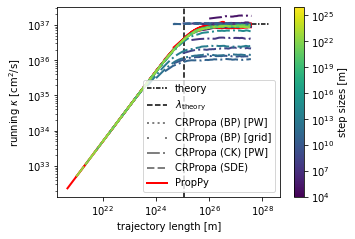

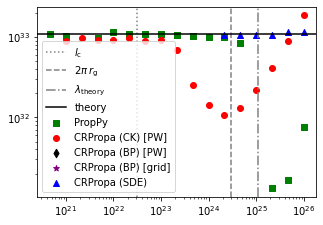

In [21]:
comparison.plot_running_diffusion_coefficients(d_theory=[traj_max*pc, traj_max*5*pc], pp_step_max=lambda_theory*pc)

Note that the color-code (cc) is only used for running diffusion coefficients simulated with CRPropa, as the ones simulated with RWPropa overlay (see red lines) -> the differences in the step sizes are not visible.

### Convergence tests of diffusion coefficients

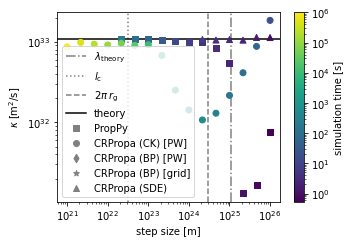

In [22]:
comparison.plot_kappa_convergence_tests()

[]

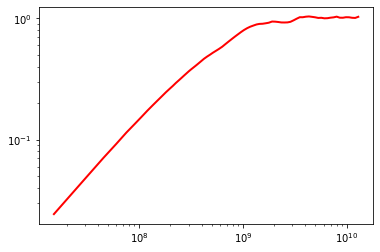

In [12]:
l = np.load(path_data+'/sim_result_proppy_stepsize_0.00015040793368803604_l.npy')
kappa_bp = np.load(path_data+'/sim_result_proppy_stepsize_0.00015040793368803604_kappa.npy')
plt.plot(l, kappa_bp, color='red', ls='-', zorder=2, lw=2) 
plt.loglog()

For RWPropa SImulations, the step size shown here does not appear to have a noticeable effect on the diffusion coefficients. The steps can be significantly larger than the correlation length of the turbulence and than the gyration radius of the particles. This is not surprising, since in the correlated random walk in Cartesian coordinates used in RWPropa for isotropic turbulence, the gyration motion and the turbulence does not need to be resolved.

For CRPropa, on the other hand, the resolution plays a significant role in the integration of the particle trajectories. Only for small step sizes, when both the relevant scales of turbulence and gyration motion are resolved, does the diffusion coefficient converge against the prediction of the theory. As soon as the step size becomes larger than the correlation length of the turbulence, diffusion coefficients are wrong. See the appendix in Reichherzer 2020 for a detailed discussion of this effect. If the step size is larger than the gyroradius, the diffusion coefficients increase again, because now averaging over the large steps becomes too large.

Note that the CRPropa results should be averaged over different realisations of the turbulence, which would further increase the simulation time. At least 100 realizations are needed to become reasonable good simulation results. This would increase the simulation tiems by an additional factor of 100!

### Comparison of simulation times

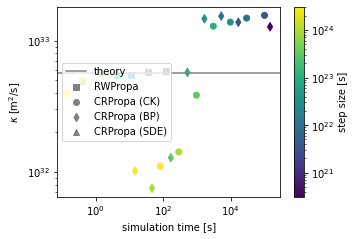

In [54]:
comparison.plot_kappa_vs_time_steps()

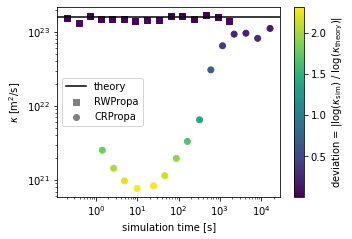

In [13]:
comparison.plot_kappa_vs_time_deviation()

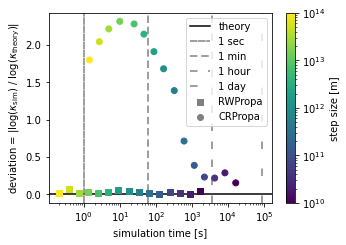

In [14]:
comparison.plot_deviation_vs_time_steps()

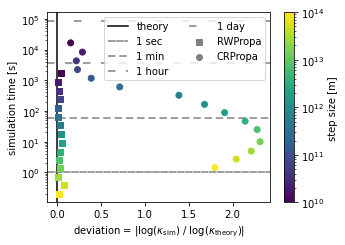

In [15]:
comparison.plot_time_vs_deviation_steps()

In [5]:
df_bp_results = pd.read_pickle(path_data+'/crp_sim_data_BP.pkl')
df_bp_results
#df_bp_results_test = pd.read_pickle(path_data+'/crp_sim_data_BP_test.pkl')
#df_bp_results_test.index = [7]

NameError: name 'pd' is not defined

In [49]:
merged_df = pd.concat([df_bp_results,df_bp_results_test])
merged_df.to_pickle(path_data+'/crp_sim_data_BP.pkl')